In [224]:
import numpy as np
import matplotlib.pyplot as plt


In [207]:
#1)

Apower = np.array([[1/3, 1/2, 1/2, 1/2, 1], [1/3, 0, 0, 1/2, 0], [0, 1/2, 1/2, 0, 0], [1/3, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
x0 = np.array([[1], [0], [0], [0], [0]])

eigvecpower = np.array([])
for iterspower in range (1, 101):
    
    product = Apower@x0
    xnew = product/np.linalg.norm(product,2)
    step = np.linalg.norm(xnew - x0)
    
    if step < 1e-5:
        print(iterspower)
        eigvecpower = np.abs(xnew)
        eigvalpower = (xnew.T @ Apower @ xnew) / (xnew.T @ xnew)
        print(eigvalpower)
        break
    
    x0 = xnew

#print(eigvecpower)



9
[[1.00000008]]


In [211]:
#2a)

def f(v):
    x = v[0]; y = v[1]; z = v[2]
    f1 = z - np.exp(x)
    f2 = z - 1 + np.exp(x+y)
    f3 = y - x*z - z**3
    fv = np.array([f1, f2, f3])
    return fv

def J(v):
    x = v[0]
    y = v[1]
    z = v[2]
    dxf1 = -np.exp(x)
    dyf1 = 0 
    dzf1 = 1
    dxf2 = np.exp(x+y)
    dyf2 = np.exp(x+y)
    dzf2 = 1
    dxf3 = -z
    dyf3 = 1
    dzf3 = -x -3*z**2
    Jv = np.array([[dxf1,dyf1,dzf1], [dxf2,dyf2,dzf2], [dxf3,dyf3,dzf3]])
    return Jv

v = np.array([0, 0, 0])

fv0 = f(v)
Jv0 = J(v)


In [212]:
#2c)

for j in range (0,100):
    deltax = -np.linalg.solve(J(v),f(v))
    v = v + deltax
    
    if np.linalg.norm(f(v), 2) < 1e-5:
        numiternonlin = j
        print(numiternonlin)
        break
    
vnonlin = v
print(vnonlin)



3
[-0.61097526 -0.17170544  0.5428212 ]


In [ ]:
#3a)

imggray = np.load('imggray.npy')

U, S, VT = np.linalg.svd(imggray)
Smat = np.zeros(np.shape(imggray))
Smat[0:np.min(np.shape(imggray)), 0:np.min(np.shape(imggray))] = np.diag(S)

u1 = U[:, 0] # 200 x 1
v1 = VT[0, :] # 1 x 300
σ1 = Smat[0,0] # 1 x 1

Arank1 = np.outer(u1, v1) * σ1

print(np.shape(Arank1))

(200, 300)


In [200]:
#3b)

u10 = U[:, 0:10] # 200 x 10
v10 = VT[0:10, :] # 10 x 300
σ10 = Smat[0:10, 0:10] # 10 x 10

B = u10 @ σ10 # 200 x 10

Arank10 = B @ v10
print(np.shape(Arank10))

(200, 300)


In [ ]:
#3c)

sum = 0
r = 0
for sn in S:
    sum += sn
    r += 1
    
    if sum >= 0.8 * np.sum(S):
        break


rsvd = r - 1
print(rsvd)
Usvd = U[:, 0:rsvd] # 200 x 54
Vsvd = VT[0:rsvd, :] # 54 x 300
Σrsvd = Smat[0:rsvd, 0:rsvd] # 54 x 54 (only counts diagonal elements)

C = Usvd @ Σrsvd
Arankr = C @ Vsvd
print(np.shape(Arankr))

54
(200, 300)


In [221]:
#3d)

compressionfraction = (200 + 300 + 1) * rsvd /60000

print(compressionfraction)

0.4509


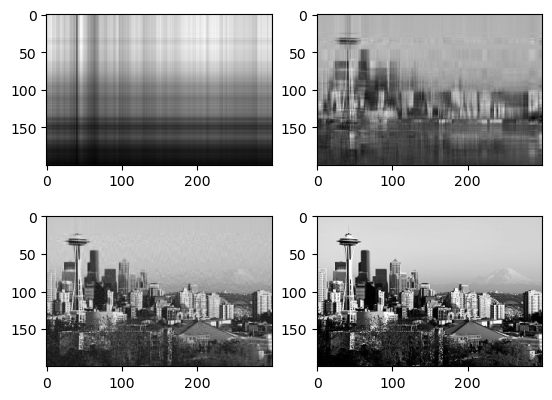

In [225]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(Arank1, cmap='gray')
ax[0,1].imshow(Arank10, cmap='gray')
ax[1,0].imshow(Arankr, cmap='gray')
ax[1,1].imshow(imggray, cmap='gray')